### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
# Dimension of train dataset

data.shape

(6368, 15)

In [5]:
# Number on unique values in each column

data.nunique()

Product_id          6368
Stall_no              50
instock_date        5350
Market_Category      248
Customer_name       5900
Loyalty_customer       2
Product_Category      10
Grade                  4
Demand               100
Discount_avail         2
charges_1            487
charges_2 (%)         17
Minimum_price       4236
Maximum_price       4618
Selling_Price       6321
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


<AxesSubplot:>

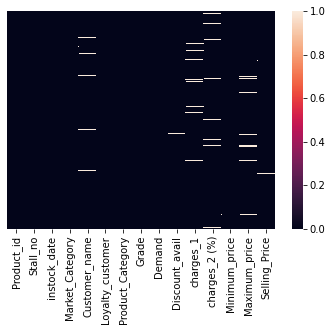

In [7]:
sns.heatmap(data.isna(),yticklabels=False)

### Pre-Processing and Handling missing values

In [8]:
data = data.drop(['Product_id','Customer_name'],axis=1)
data.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2015-08-22 18:36:12.000,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,2016-03-27 21:19:13.000,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,2015-08-18 19:25:22.000,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,2016-03-28 21:53:01.000,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,2016-03-29 22:58:53.000,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [9]:
# Check for null values in each column

data.isna().sum()

Stall_no              5
instock_date          0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [10]:
# Mapping Categorical value into numerical value

data['Loyalty_customer'] = data['Loyalty_customer'].map({'Yes':1,'No ':0})

In [11]:
def time_cat(x): # Function to convert time into AM/PM
    if x<12 :
        return 1 # AM
    else:
        return 0 # PM
    
data.instock_date = pd.to_datetime(data.instock_date)
data['Month'] = data.instock_date.apply(lambda x : x.month)
data['Year'] = data.instock_date.apply(lambda x : x.year)
data['Weekday'] = data.instock_date.apply(lambda x : x.dayofweek)
data['Time'] = data.instock_date.apply(lambda x : x.time())
data['AM'] = data.instock_date.apply(lambda x : time_cat(x.hour))
data = data.drop('instock_date',axis=1)
data.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Month,Year,Weekday,Time,AM
0,37.0,2,1,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,8,2015,5,18:36:12,0
1,38.0,24,1,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,3,2016,6,21:19:13,0
2,9.0,447,1,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,8,2015,1,19:25:22,0
3,50.0,23,1,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,3,2016,0,21:53:01,0
4,7.0,63,1,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,3,2016,1,22:58:53,0


In [14]:
# Max and Min prices of Product is correlated with Product category. So calculating mean price corresponding to product category 

cat_gp = data.groupby('Product_Category')['Maximum_price','Minimum_price'].mean()
cat_gp

,Maximum_price,Minimum_price
Product_Category,,
Child_care,6556.631494,3565.259146
Cosmetics,6601.755267,3582.313756
Educational,6134.445217,3411.135537
Fashion,6558.836268,3583.697674
Home_decor,6448.645763,3534.022838
Hospitality,6452.817420,3496.831746
Organic,6355.725753,3396.601307
Pet_care,6436.376723,3604.626844
Repair,6477.858491,3557.614009


In [15]:
# Index of dataset with mising values of Minimum and maxmum prices

ind = list(data[data.Minimum_price.isna()].index)
for i in list(data[data.Maximum_price.isna()].index):
    if i not in ind:
        ind.append(i)

ind.sort()

In [16]:
# Replacing null values with -1 to represent null value

indices = data[data.Minimum_price.isna()].index
for i in indices:
    data.Minimum_price.loc[i] = -1

indices = data[data.Maximum_price.isna()].index
for i in indices:
    data.Maximum_price.loc[i] = -1

In [17]:
# Imputing max and min prices with mean values grouped by product category

for cat in data.Product_Category.unique():
    for i in ind:
        if data.Minimum_price.loc[i] == -1 and data.Product_Category.loc[i] == cat:
            data.loc[i,'Minimum_price'] = np.round(cat_gp.loc[cat,'Minimum_price'])
        if data.Maximum_price.loc[i] == -1 and data.Product_Category.loc[i] == cat:
            data.loc[i,'Maximum_price'] = np.round(cat_gp.loc[cat,'Maximum_price'])

### Feature Selection

In [13]:
# Correlation table

data.corr()

,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,Month,Year,Weekday,AM
Stall_no,1.000000,-0.006145,0.007605,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,0.000123,0.008443,0.011733,-0.014531,0.014395,0.002488,0.006431
Market_Category,-0.006145,1.000000,0.034055,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.194787,0.134257,0.138711,0.088342,-0.153502,0.069146,0.018263
Loyalty_customer,0.007605,0.034055,1.000000,0.026700,0.005517,-0.022069,0.007030,0.011528,0.091853,0.117335,0.095660,0.039104,-0.051411,0.014069,-0.106831
Grade,-0.003449,-0.036346,0.026700,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.079583,0.164350,0.086450,-0.032201,0.026413,-0.021275,-0.023602
Demand,0.004302,-0.018800,0.005517,0.010107,1.000000,0.010230,-0.007370,0.017653,0.010283,0.003987,-0.000601,0.013748,-0.008687,0.011331,0.011304
Discount_avail,-0.019656,-0.003306,-0.022069,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.009817,-0.003918,-0.512457,-0.085760,0.134833,-0.015543,0.160483
charges_1,-0.010224,0.019009,0.007030,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.019448,0.012169,0.053045,0.010949,-0.014331,-0.004165,-0.010578
charges_2 (%),-0.004745,0.024154,0.011528,-0.016644,0.017653,0.018905,0.270625,1.000000,0.005448,0.009816,0.009031,-0.007235,-0.000971,-0.002125,0.001617
Minimum_price,0.000123,0.194787,0.091853,-0.079583,0.010283,0.009817,0.019448,0.005448,1.000000,0.708038,0.700444,-0.013256,0.057309,0.006299,0.118302
Maximum_price,0.008443,0.134257,0.117335,0.164350,0.003987,-0.003918,0.012169,0.009816,0.708038,1.000000,0.766928,-0.112665,0.179151,-0.066453,0.076364


In [21]:
# Selling Price is more than 70% correlated with max and min prices and about -51% with discount avail column.
# Other columns does not play much of role in deciding selling price

df = data.loc[:,['Discount_avail','Minimum_price','Maximum_price','Selling_Price']]
df.head()

,Discount_avail,Minimum_price,Maximum_price,Selling_Price
0,0.0,2983.0,4713.0,4185.947700
1,0.0,7495.0,10352.0,9271.490256
2,0.0,5752.0,7309.0,6785.701362
3,0.0,5090.0,20814.0,13028.917824
4,1.0,2430.0,9261.0,906.553935


In [23]:
df.isna().sum()

Discount_avail    38
Minimum_price      0
Maximum_price      0
Selling_Price     41
dtype: int64

In [25]:
# Null values are comparatively very less to total number of rows.
# So even after dropping these rows, we will have enough data to fit model without affecting much of it's accuracy.

df = df.dropna()

### Model Fitting and prediction

In [26]:
# Splitting dataset into dependent and indepent variables.
# Using cross val score to check accuracy and checking for overfitting/underfitting of model.
# Random Forest works well with large data and also handles outliers onn it's own

from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop('Selling_Price',axis=1).values
y = df.Selling_Price.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

from sklearn.ensemble import RandomForestRegressor
cv = cross_val_score(RandomForestRegressor(),X_train,y_train, cv=10,n_jobs=-1,verbose=2)
cv.mean(), cv.max(), cv.min()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.1s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.9s finished


(0.9646554147725077, 0.9826474891875161, 0.8985321796293468)

In [27]:
# Roughly checking the accuracy of Random Forest model.

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test) # predcited selling prices by model

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, pred)

0.9619836464232477

### Hyper-parameter Tuning

In [28]:
# Selecting approporiate parameters for model to avoid overfitting and underfitting using random search cv.

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 200,5)]
min_samples_split = np.arange(1,15,1)
min_samples_leaf = np.arange(1,15,1)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':["mse", "mae"]}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 57, 105, 152, 200], 'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['mse', 'mae']}


In [29]:
rf = RandomForestRegressor()
rdm_cv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
rdm_cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 57, 105, 152, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=100, verbose=2)

In [30]:
# Accuracy of tuned model

rdm_cv.best_score_

0.9690983068640736

In [33]:
# Best tuned selected by random search cv.

rdm_cv.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=200, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=300)

In [38]:
# New model and it's accuracy.

model2 = rdm_cv.best_estimator_
model2.fit(X_train, y_train)
pred = model2.predict(X_test) # Predicted selling prices by model
explained_variance_score(y_test, pred)

0.9638889259209678

### Pre-Processing, handling missing values and making prediction on test dataset

In [39]:
# Test Dataset

df = pd.read_csv('test.csv')
df.isna().sum()

Product_id           0
Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2 (%)        5
Minimum_price       14
Maximum_price        0
dtype: int64

In [40]:
# Replaced null values in min price column with -1 and again replaced them with mean values calculated by grouping product
# category column values of train dataset.

indices = df[df.Minimum_price.isna()].index
for i in indices:
    df.Minimum_price.loc[i] = -1
    
for cat in df.Product_Category.unique():
    for i in indices:
        if df.Minimum_price.loc[i] == -1 and df.Product_Category.loc[i] == cat:
            df.loc[i,'Minimum_price'] = np.round(cat_gp.loc[cat,'Minimum_price'])

In [42]:
# Selected features for used by model to predict selling price.

test_df = df.loc[:,['Discount_avail','Minimum_price','Maximum_price']]
test_df.isna().sum()

Discount_avail    0
Minimum_price     0
Maximum_price     0
dtype: int64

In [43]:
# Predcting Selling price by model.

predictions = model2.predict(test_df)

### Submission DataFrame and saving into csv file

In [48]:
# Concatenate product id and predicted selling price into a dataframe

sub_pred = pd.concat((df.Product_id,pd.DataFrame(predictions,columns=['Selling_Price'])),axis=1)

In [49]:
sub_pred

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3115.106886
1,ACCEGCATKHNRXUHW,1822.119797
2,NKCE6GJ5XVJDXNNZ,11546.327770
3,NKCEB8BK3ZXDHDHM,9407.798176
4,TOPEFDXSAHRNPF94,5393.167971
...,...,...
3425,BBAE9K7BXFUTDNBK,4070.539365
3426,RTRDYPA4PJHCJCGF,8981.707256
3427,TUNE8FWQBS7TVVT7,6672.564876
3428,NKCEGMUABCRGUZPE,3513.125078


In [51]:
# Saving the dataframe into csv file

sub_pred.to_csv('Submission.csv')